In [14]:
import nwswx
import numpy as np
import matplotlib.pyplot as plt
import math

In [15]:
nws = nwswx.WxAPI('hgall7@gmail.com')
forecast = nws.point_hourly_forecast(41.409120, -71.563560,
                              return_format=nwswx.formats.JSONLD)
weather_data = forecast['periods']
print(weather_data[0]['temperature'])

25


In [16]:
def WCI(ta, v):
    return (35.74 + 0.6215*ta - 35.75*(v**0.16) + 0.4275*ta*(v**0.16))

[25, 22, 21, 20, 20, 28, 34, 37, 39, 40, 39, 40]
[17.894251904237567, 15.330346165816144, 16.874039617016226, 15.742885519949258, 20.970000000000002, 24.79211829648505, 28.612621611906235, 30.405891406675867, 32.864083447177165, 41.95000000000001, 40.901, 41.95000000000001]


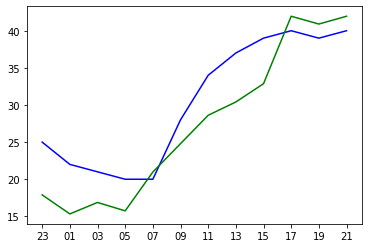

In [17]:
temps = [weather_data[i]['temperature'] for i in range(0,24,2)]
nums = [weather_data[i]['startTime'][11:13] for i in range(0,24,2)]
wind_speeds = [int(weather_data[i]['windSpeed'][0]) for i in range(0,24,2)]
wind_chills = [WCI(temps[i],wind_speeds[i]) for i in range(len(temps))]
print(temps)
print(wind_chills)
plt.plot(nums, temps, 'b-')
plt.plot(nums, wind_chills, 'g-')
plt.show()

[6, 5, 3, 3, 1, 3, 6, 9, 9, 1, 1, 1]


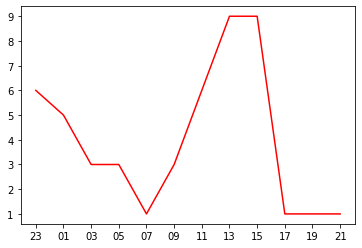

In [19]:
plt.plot(nums, wind_speeds, 'r-')
print(wind_speeds)
plt.show()

In [41]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        width = rect.get_width()
        plt.annotate('{}'.format(width),
                    xy=(width, rect.get_y()),
                    xytext=(10, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

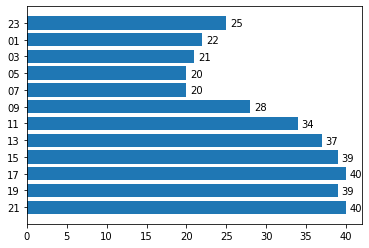

In [47]:
rects1 = plt.barh(nums[::-1], temps[::-1])

autolabel(rects1)
plt.show()